In [2]:
library(tidyverse)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## Predicting the risk of Diabetes for an Individual

We will use a diabetes dataset for this project. 
Our aim is to predict one’s risk of diabetes given the person’s Glucose rate, Insulin rate, BMI, Diabetes Pedigree Function, and Age. 

The dataset we are using has variables: Glucose, Insulin, BMI, Diabetes Pedigree Function, Age,  Skin thickness, Pregnancy, Blood pressure, and outcome. Outcome has 2 categorical classification where the number “0” means no diabetes, and “1” means diabetes. 
Diabetes refers to a disease due to high levels of glucose in blood. Insulin is a hormone that regulates blood sugar levels. This explains a strong relationship between the two variables. That said, someone with an insulin rate that is above or below the average rate in extreme cases has a higher risk of diabetes. Also, BMI is an indicator of body fat distribution. BMI is related to diabetes as a higher BMI signals a higher risk of diabetes. Diabetes Pedigree Function tracks the family history of diabetes, and gives a value that represents the likelihood of diabetes. Therefore, a higher value of diabetes pedigree function suggests a higher chance of diabetes. Also, as one ages, the risk of developing diabetes increases. With this background information, we can study the relationship and correlation between the variables Glucose, Insulin, BMI, Diabetes Pedigree Function, Age and the disease, diabetes. That said, we will set the predictors to be Glucose, Insulin, BMI, Diabetes Pedigree Function, and Age to predict one’s risk of diabetes. We will exclude the pregnancy, Blood pressure, and Skin thickness columns since their correlation to diabetes is weaker than the selected ones. Moreover, when we tidy the dataset, we will filter out the 0 BMI in our data set, as there is no such thing as 0 BMI in reality. 

We expect to predict whether an individual is at a high risk of diabetes. We limit the following research question to predict the “risk” of diabetes, as we do not have enough information to identify the exact presence of diabetes. We expect the result to be such that people with high glucose and BMI, older in age, extremely above or below the average insulin rate, and high Diabetes Pedigree Function have a higher possibility of having diabetes. This finding can help predict the possible onset of diabetes early so that one can seek help as soon as possible. The findings can be used to determine the variables in this study with the maximum impact in indicating the risk of diabetes.We will use ggpairs to visualize the results of each variable’s combination and color our plot points with respect to the outcomes. This will help visualize the variables’ relationship and diabetes in an understandable way.

In the table,  we have calculated the mean value of each parameter for the two cases where a person has diabetes and no diabetes. This informs us of the parameter's general value of each case and thereby we can learn the relationship between the parameter values and the outcome.


In [13]:
set.seed(5924)

diabetes <- read_csv("https://raw.githubusercontent.com/jessicazhaojy/dsci100groupproject/main/diabetes.csv") |>
                     mutate(Outcome = as_factor(Outcome))
diabetes

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


In [14]:
diabetes_tidy <- diabetes |>
select(-Pregnancies, -BloodPressure, -SkinThickness) |>
filter(BMI != "0")

diabetes_tidy

Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
148,0,33.6,0.627,50,1
85,0,26.6,0.351,31,0
183,0,23.3,0.672,32,1
89,94,28.1,0.167,21,0
137,168,43.1,2.288,33,1
116,0,25.6,0.201,30,0
78,88,31.0,0.248,26,1
115,0,35.3,0.134,29,0
197,543,30.5,0.158,53,1


In [15]:
diabetes_split <- initial_split(diabetes_tidy, prop = 0.75, strata = Outcome)  
diabetes_training <- training(diabetes_split)   
diabetes_testing <- testing(diabetes_split)

diabetes_training
diabetes_testing

Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
116,0,25.6,0.201,30,0
115,0,35.3,0.134,29,0
110,0,37.6,0.191,30,0
139,0,27.1,1.441,57,0
126,235,39.3,0.704,27,0
99,0,35.4,0.388,50,0
145,110,22.2,0.245,57,0
117,0,34.1,0.337,38,0
109,0,36.0,0.546,60,0


Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
85,0,26.6,0.351,31,0
89,94,28.1,0.167,21,0
137,168,43.1,2.288,33,1
78,88,31.0,0.248,26,1
118,230,45.8,0.551,31,1
103,83,43.3,0.183,33,0
115,96,34.6,0.529,32,1
97,140,23.2,0.487,22,0
92,0,19.9,0.188,28,0


In [16]:
mean_value_with_diabetes <- diabetes_training |>
filter(Outcome == 1) |>
mutate(Outcome = 1) |>
map_df(mean, na.rm = FALSE)
mean_value_with_diabetes

mean_value_without_diabetes <- diabetes_training |>
filter(Outcome == 0) |>
mutate(Outcome = 0) |>
map_df(mean, na.rm = FALSE)
mean_value_without_diabetes

Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
141.9548,103.9799,35.31256,0.5440352,36.35678,1


Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
110.5109,67.33152,30.85652,0.4372745,31.06522,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



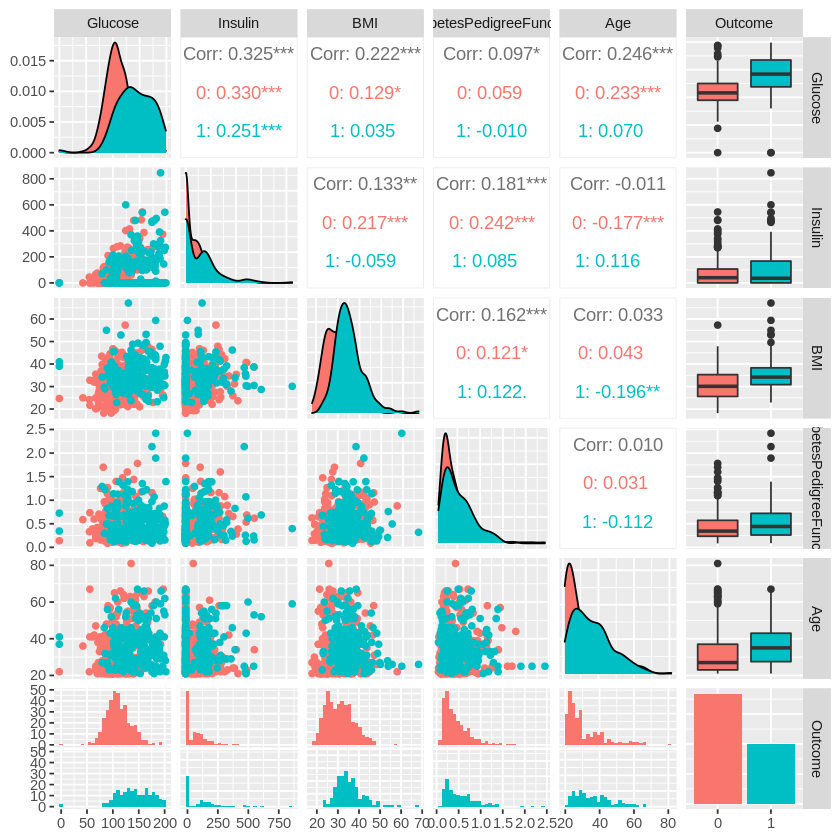

In [17]:
library(GGally)

ggpairs(diabetes_training, ggplot2::aes(colour = Outcome))

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.6806288,5,0.011934323,Preprocessor1_Model01
2,roc_auc,binary,0.7041857,5,0.007026330,Preprocessor1_Model01
3,accuracy,binary,0.6966215,5,0.009206866,Preprocessor1_Model02
3,roc_auc,binary,0.7299733,5,0.010608178,Preprocessor1_Model02
4,accuracy,binary,0.6966215,5,0.009206866,Preprocessor1_Model03
4,roc_auc,binary,0.7572302,5,0.013678851,Preprocessor1_Model03
5,accuracy,binary,0.7266488,5,0.004479042,Preprocessor1_Model04
5,roc_auc,binary,0.7706983,5,0.009188999,Preprocessor1_Model04
7,accuracy,binary,0.7512573,5,0.006446102,Preprocessor1_Model05


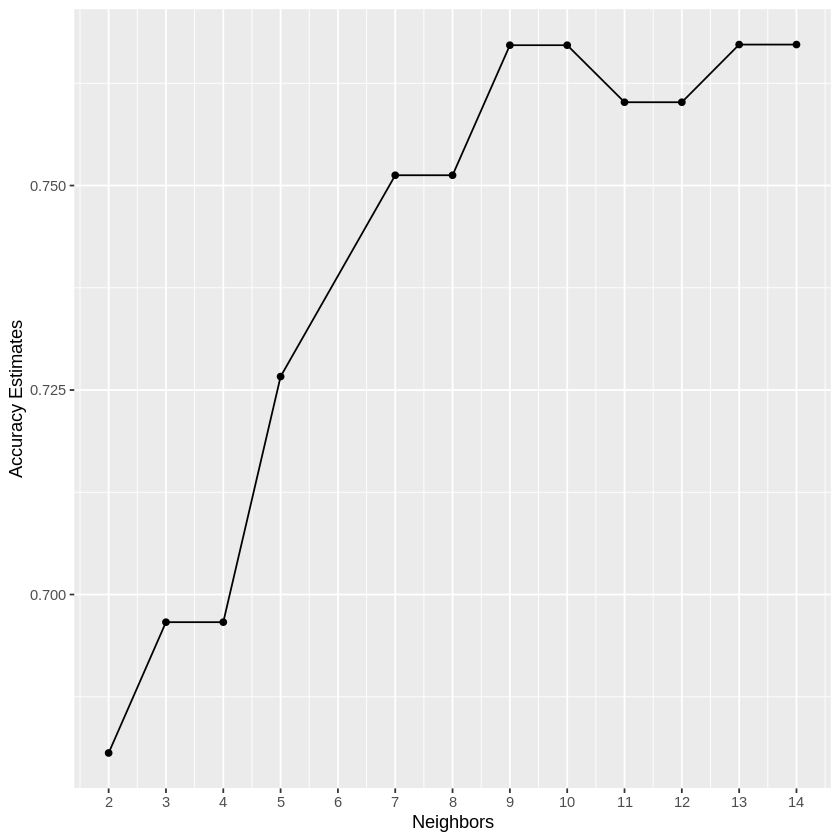

In [18]:
training_recipe <- recipe(Outcome ~ ., data = diabetes_training) 

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

training_vfold <- vfold_cv(diabetes_training, v=5, strata = Outcome)

knn_results <- workflow() |>
add_recipe(training_recipe) |>
add_model(knn_tune) |> 
tune_grid(resamples = training_vfold, grid = 14) |>
collect_metrics()
knn_results


accuracies <- knn_results |>
filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x=neighbors, y=mean)) +
geom_point()+
geom_line()+
labs(x="Neighbors", y= "Accuracy Estimates") +
scale_x_continuous(breaks = seq(0, 14, by = 1))# +
# scale_y_continuous(limits = c(0.4, 1.0))


cross_val_plot

In [21]:
diabetes_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 14) |>
set_engine("kknn") |>
set_mode("classification")
diabetes_spec

diabetes_fit <- workflow() |>
add_recipe(training_recipe) |>
add_model(diabetes_spec) |>
fit(data=diabetes_training)
diabetes_fit


K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 14
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(14,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2275132
Best kernel: rectangular
Best k: 14

In [22]:
diabetes_predictions <-  predict(diabetes_fit, diabetes_testing) |>
bind_cols(diabetes_testing) 
diabetes_predictions

diabetes_metrics <- diabetes_predictions |> 
    metrics(truth = Outcome, estimate = .pred_class) 
diabetes_metrics

diabetes_conf_mat <- diabetes_predictions |>
conf_mat(truth = Outcome, estimate = .pred_class)
diabetes_conf_mat

.pred_class,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,85,0,26.6,0.351,31,0
0,89,94,28.1,0.167,21,0
1,137,168,43.1,2.288,33,1
0,78,88,31.0,0.248,26,1
0,118,230,45.8,0.551,31,1
0,103,83,43.3,0.183,33,0
0,115,96,34.6,0.529,32,1
0,97,140,23.2,0.487,22,0
0,92,0,19.9,0.188,28,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7736842
kap,binary,0.4582947


          Truth
Prediction   0   1
         0 114  34
         1   9  33